
# Veri Kümesi Hakkında

## İÇERİK
Kullanılmış ve yenilenmiş cihaz pazarı, hem tüketicilere hem de satın alırken paradan tasarruf etmek isteyen işletmelere uygun maliyetli alternatifler sağladığı için son on yılda önemli ölçüde büyüdü. Cihazların ömrünün ikinci el ticareti yoluyla en üst düzeye çıkarılması, çevresel etkilerini de azaltır ve geri dönüşüme ve atığın azaltılmasına yardımcı olur. Yenilenmiş / kullanılmış cihazların normalleştirilmiş kullanılmış ve yeni fiyatlandırma verilerinin örnek bir veri kümesini burada bulabilirsiniz.

## AMAÇ
Amaç, Keşif Veri Analitiği yapmak ve Lineer Regresyon uygulayarak bu tür cihazların fiyatlandırılmasına yardımcı olabilecek bir model oluşturmaktır.

## Değişkenler
__device_brand__: Üretim markasının adı
__os__: Cihazın çalıştığı işletim sistemi
__screen_size__: Ekranın cm cinsinden boyutu
__4g__: 4G'nin mevcut olup olmadığı
__5g__: 5G'nin mevcut olup olmadığı
__front_camera_mp__: Arka kameranın megapiksel cinsinden çözünürlüğü
__back_camera_mp__: Ön kameranın megapiksel cinsinden çözünürlüğü
__internal_memory__: GB cinsinden dahili bellek (ROM) miktarı
__ram__: GB cinsinden RAM miktarı
__battery__: Cihaz pilinin mAh cinsinden enerji kapasitesi
__weight__: Cihazın gram cinsinden ağırlığı
__release_year__: Cihaz modelinin piyasaya sürüldüğü yıl
__days_used__: Kullanılmış/yenilenmiş cihazın kullanıldığı gün sayısı
__normalized_new_price__: Aynı modelden yeni bir cihazın normalleştirilmiş fiyatı
__normalized_used_price (TARGET)__: Kullanılmış/yenilenmiş cihazın normalleştirilmiş fiyatı

## Kaggle Dataset URL
https://www.kaggle.com/datasets/ahsan81/used-handheld-device-data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Kütüphanelerin Yüklenmesi

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import statsmodels.api as sm
import pickle as pk

# Verisetinin okunması

In [ ]:
data = pd.read_csv('/content/drive/MyDrive/machine_learning_projeleri/used_device_data.csv')

In [ ]:
data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   device_brand           3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   rear_camera_mp         3275 non-null   float64
 6   front_camera_mp        3452 non-null   float64
 7   internal_memory        3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

In [ ]:
data.describe()

,screen_size,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
count,3454.000000,3275.000000,3452.000000,3450.000000,3450.000000,3448.000000,3447.000000,3454.000000,3454.000000,3454.000000,3454.000000
mean,13.713115,9.460208,6.554229,54.573099,4.036122,3133.402697,182.751871,2015.965258,674.869716,4.364712,5.233107
std,3.805280,4.815461,6.970372,84.972371,1.365105,1299.682844,88.413228,2.298455,248.580166,0.588914,0.683637
min,5.080000,0.080000,0.000000,0.010000,0.020000,500.000000,69.000000,2013.000000,91.000000,1.536867,2.901422
25%,12.700000,5.000000,2.000000,16.000000,4.000000,2100.000000,142.000000,2014.000000,533.500000,4.033931,4.790342
50%,12.830000,8.000000,5.000000,32.000000,4.000000,3000.000000,160.000000,2015.500000,690.500000,4.405133,5.245892
75%,15.340000,13.000000,8.000000,64.000000,4.000000,4000.000000,185.000000,2018.000000,868.750000,4.755700,5.673718
max,30.710000,48.000000,32.000000,1024.000000,12.000000,9720.000000,855.000000,2020.000000,1094.000000,6.619433,7.847841


# Eksik Veri Analizi

In [ ]:
data.isnull().sum()

device_brand               0
os                         0
screen_size                0
4g                         0
5g                         0
rear_camera_mp           179
front_camera_mp            2
internal_memory            4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

## Eksik Verilerin Atılması

In [ ]:
data = data.dropna()

# Dublike veri Kontrolü

In [ ]:
data.duplicated().sum()

0

## Kategorik Verilerin Numerik Veriye Dönüşümü

In [ ]:
dict_G = {'yes':1,'no':0}

In [ ]:
data['4g'] = data['4g'].map(dict_G)

In [ ]:
data['5g'] = data['5g'].map(dict_G)

In [ ]:
data.head()

,device_brand,os,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
data.os.value_counts()

Android    3024
Others      128
Windows      65
iOS          36
Name: os, dtype: int64

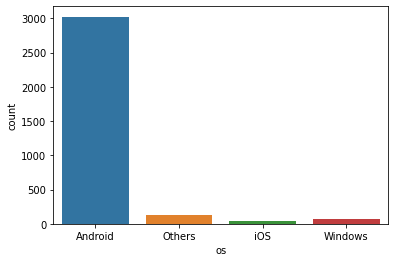

In [ ]:
sns.countplot(data['os'])

In [ ]:
data.device_brand.value_counts()

Others        502
Samsung       341
Huawei        251
LG            201
Lenovo        171
ZTE           136
Alcatel       121
Asus          118
Micromax      117
Honor         116
HTC           110
Xiaomi        109
Oppo          109
Vivo          103
Nokia          97
Motorola       88
Sony           79
Gionee         56
Acer           51
Panasonic      45
Meizu          44
XOLO           42
Apple          39
Lava           34
Celkon         33
Spice          30
Karbonn        29
Microsoft      21
Coolpad        19
BlackBerry     18
Google         13
OnePlus         5
Realme          5
Name: device_brand, dtype: int64

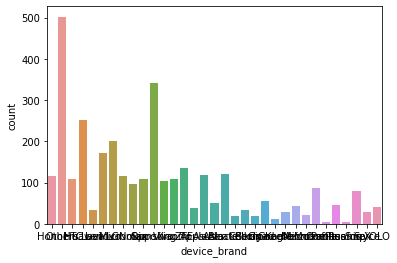

In [ ]:
sns.countplot(data['device_brand'])

## OS ve device_brand dengesiz dağılıma sahip. bu durum makine öğrenmesi modelimizi olumsuz etkileyeceğinden bu iki özellik atılacaktır.

In [ ]:
data = data.drop(['os','device_brand'],axis=1)

In [ ]:
data['release_year'].value_counts()

2014    639
2013    567
2015    507
2019    399
2016    381
2018    310
2017    297
2020    153
Name: release_year, dtype: int64

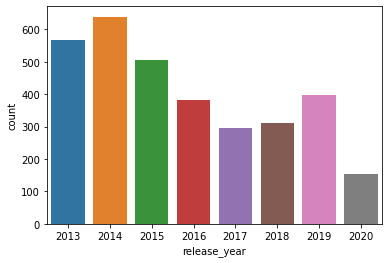

In [ ]:
sns.countplot(data['release_year'])

# Verisetindeki özelliklerin histogram dağıllımı

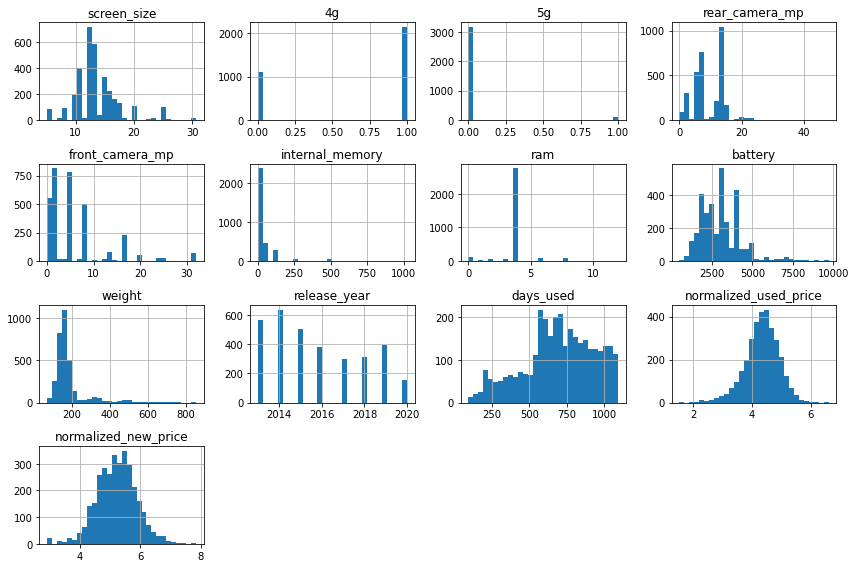

In [ ]:
data.hist(figsize=(12,8),bins=30)
plt.tight_layout()

## Özellikler arasındaki ilişkiyi görebilmek için Korelasyon Matrisi

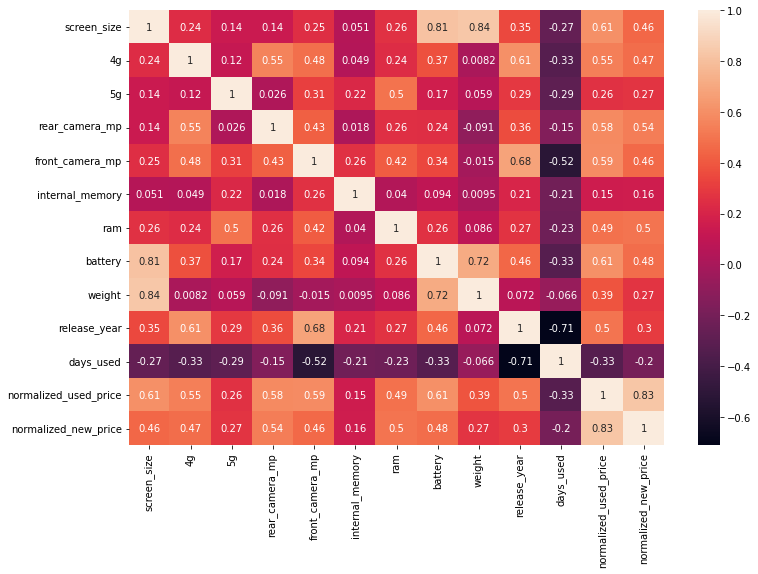

In [ ]:
fig = plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True)

In [ ]:
data.head()

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,25.50,1,1,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
columns=data.columns

In [ ]:
columns

Index(['screen_size', '4g', '5g', 'rear_camera_mp', 'front_camera_mp',
       'internal_memory', 'ram', 'battery', 'weight', 'release_year',
       'days_used', 'normalized_used_price', 'normalized_new_price'],
      dtype='object')

## Aykırı Değer Tespiti

In [ ]:
def detect_outliers(columns):
    outlier_indices = []

    for column in columns:
        # 1st quartile
        Q1 = np.percentile(data[column], 25)
        # 3st quartile
        Q3 = np.percentile(data[column], 75)
        # IQR
        IQR = Q3 - Q1
        # Outlier Step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = data[(data[column] < Q1 - outlier_step)
                              | (data[column] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
        return outlier_indices

In [ ]:
len(detect_outliers(columns))

440

## 440 adet aykırı değer bulunmuştur.

In [ ]:
len(detect_outliers(columns))

440

## Aykırı değerlerin atılması

In [ ]:
data = data.drop(detect_outliers(columns),axis = 0).reset_index(drop = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2813 entries, 0 to 2812
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   screen_size            2813 non-null   float64
 1   4g                     2813 non-null   int64  
 2   5g                     2813 non-null   int64  
 3   rear_camera_mp         2813 non-null   float64
 4   front_camera_mp        2813 non-null   float64
 5   internal_memory        2813 non-null   float64
 6   ram                    2813 non-null   float64
 7   battery                2813 non-null   float64
 8   weight                 2813 non-null   float64
 9   release_year           2813 non-null   int64  
 10  days_used              2813 non-null   int64  
 11  normalized_used_price  2813 non-null   float64
 12  normalized_new_price   2813 non-null   float64
dtypes: float64(9), int64(4)
memory usage: 285.8 KB


## telefonun çıkarılma tarihini one hot endocing ile dönüşümü

In [ ]:
dummies_year = pd.get_dummies(data['release_year'],drop_first=True)
data = pd.concat([data,dummies_year],axis=1)
data = data.drop('release_year',axis=1)

In [ ]:
data.head()

,screen_size,4g,5g,rear_camera_mp,front_camera_mp,internal_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,2014,2015,2016,2017,2018,2019,2020
0,14.50,1,0,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,0,0,0,0,0,0,1
1,17.30,1,1,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,0,0,0,0,0,0,1
2,16.69,1,1,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,0,0,0,0,0,0,1
3,15.32,1,0,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,0,0,0,0,0,0,1
4,16.23,1,0,13.0,8.0,64.0,4.0,4000.0,176.0,223,4.413889,5.060694,0,0,0,0,0,0,1


# Train and Test Ayrımı

In [ ]:
y = data['normalized_used_price']
X = data.drop(['normalized_used_price'], axis=1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Özelliklerin daha sade bir şekil alması ve aykırı değerlerden etkilenmemek için standart Scaler yapıldı.

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

## Performans Metrikleri
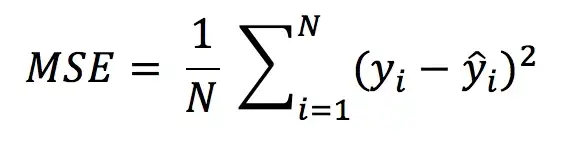

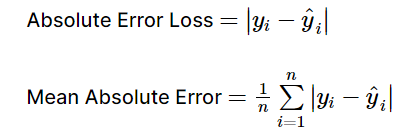


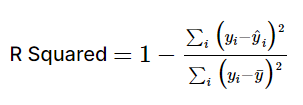

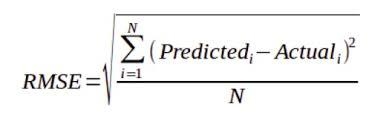

# Linear Regression Model

In [ ]:
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
y_pred = linear_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  0.04900523947064604
MAE:  0.176084506429108
RMSE:  0.22137127065327614
R2 Score :  0.8029976480068457


# SVM Regressor

In [ ]:
svmreg_model = SVR()
svmreg_model.fit(X_train,y_train)
y_pred = svmreg_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  0.050413295843044326
MAE:  0.1749497254114277
RMSE:  0.2245290534497581
R2 Score :  0.7973372243440338


# DecisionTree Regressor

In [ ]:
dtree_model = DecisionTreeRegressor()
dtree_model.fit(X_train,y_train)
y_pred = dtree_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  0.08946421100007855
MAE:  0.2319442498744076
RMSE:  0.29910568533559934
R2 Score :  0.6403515179885122


# RandomForest Regressor

In [ ]:
rfr_model = RandomForestRegressor()
rfr_model.fit(X_train,y_train)
y_pred = rfr_model.predict(X_test)
print("MSE : ",mean_squared_error(y_test,y_pred))
print("MAE: ", mean_absolute_error(y_test,y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R2 Score : ",r2_score(y_test,y_pred))

MSE :  0.05051628361557037
MAE:  0.18023606523287913
RMSE:  0.22475827819141694
R2 Score :  0.796923210788885


**Sonuç:**

Sonuç olarak en iyi performansa sahip yöntem Linear regression yöntemi olmuştur.

## Pickle kütüphanesi kullanılarak elde ettiğimiz modeli daha sonra kullanabilmek için indiriyoruz.

In [ ]:
import pickle
pickle.dump(linear_model, open("phone_price_prediction_model.pkl", "wb"))
print("Model başarılı şekilde oluşturuldu")

Model başarılı şekilde oluşturuldu
